<a href="https://colab.research.google.com/github/Monika735503/BIOINFORMATICS/blob/main/Metagenomics_EXPT_NO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generated OTU Table (First 5 Rows) ---
           Sample_A  Sample_B  Sample_C  Sample_D
Species_1        51        92        14        71
Species_2        60        20        82        86
Species_3        74        74        87        99
Species_4        23         2        21        52
Species_5         1        87        29        37


--- Alpha Diversity (Shannon Index) ---
Sample_A    2.668797
Sample_B    2.855760
Sample_C    2.794169
Sample_D    2.719279
dtype: float64




/tmp/ipython-input-3458935287.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')


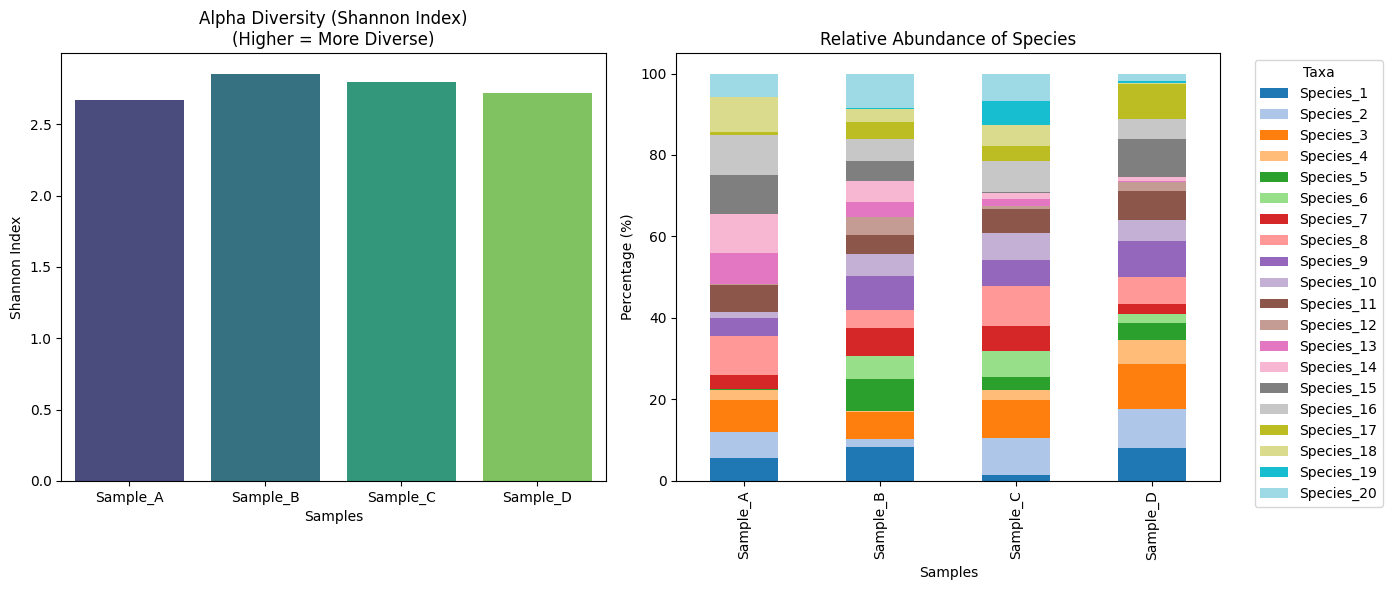

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Data Simulation (Creating a Mock OTU Table)
# ---------------------------------------------------------
np.random.seed(42)
taxa = [f"Species_{i}" for i in range(1, 21)]  # 10 different species
samples = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D']  # 4 samples

# Generate random read counts
data = np.random.randint(0, 100, size=(20, 4))
df = pd.DataFrame(data, index=taxa, columns=samples)

print("--- Generated OTU Table (First 5 Rows) ---")
print(df.head())
print("\n")

# ---------------------------------------------------------
# 2. Alpha Diversity Analysis (Shannon Index)
# ---------------------------------------------------------
# Formula: H = -sum(p_i * ln(p_i))
def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = counts / total
    proportions = proportions[proportions > 0]  # avoid log(0)
    return -np.sum(proportions * np.log(proportions))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- Alpha Diversity (Shannon Index) ---")
print(alpha_diversity)
print("\n")

# ---------------------------------------------------------
# 3. Relative Abundance Calculation
# ---------------------------------------------------------
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Alpha Diversity
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')
plt.title('Alpha Diversity (Shannon Index)\n(Higher = More Diverse)')
plt.ylabel('Shannon Index')
plt.xlabel('Samples')

# Plot 2: Relative Abundance (Stacked Bar Chart)
plt.subplot(1, 2, 2)
relative_abundance.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Relative Abundance of Species')
plt.ylabel('Percentage (%)')
plt.xlabel('Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Taxa")

plt.tight_layout()
plt.show()



In [ ]:
!apt-get update
!apt-get install -y vsearch


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,510 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ge

In [ ]:
!vsearch --version


vsearch v2.21.1_linux_x86_64, 12.7GB RAM, 2 cores
https://github.com/torognes/vsearch

Rognes T, Flouri T, Nichols B, Quince C, Mahe F (2016)
VSEARCH: a versatile open source tool for metagenomics
PeerJ 4:e2584 doi: 10.7717/peerj.2584 https://doi.org/10.7717/peerj.2584

Compiled with support for gzip-compressed files, and the library is loaded.
zlib version 1.2.11, compile flags a9
Compiled with support for bzip2-compressed files, and the library is loaded.


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
vsearch is already the newest version (2.21.1-1).
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
Downloads complete!

Subsampling FASTQ files...
Subsampling complete!

Converting FASTQ → FASTA...
FASTA conversion complete!

Combined FASTA created!

Running dereplication...
Clustering OTUs (97%)...
OTU clustering complete!

Mapping reads to OTUs...

REAL OTU TABLE:
            SRR11365243_1  SRR11365244_1  SRR11365245_1  SRR11365247_1  \
OTU_2776\n              1              0              0              0   
OTU_3782\n              1              0              0              0   
OTU_1746\n              1              0              1              1   
OTU_4791\n              1         

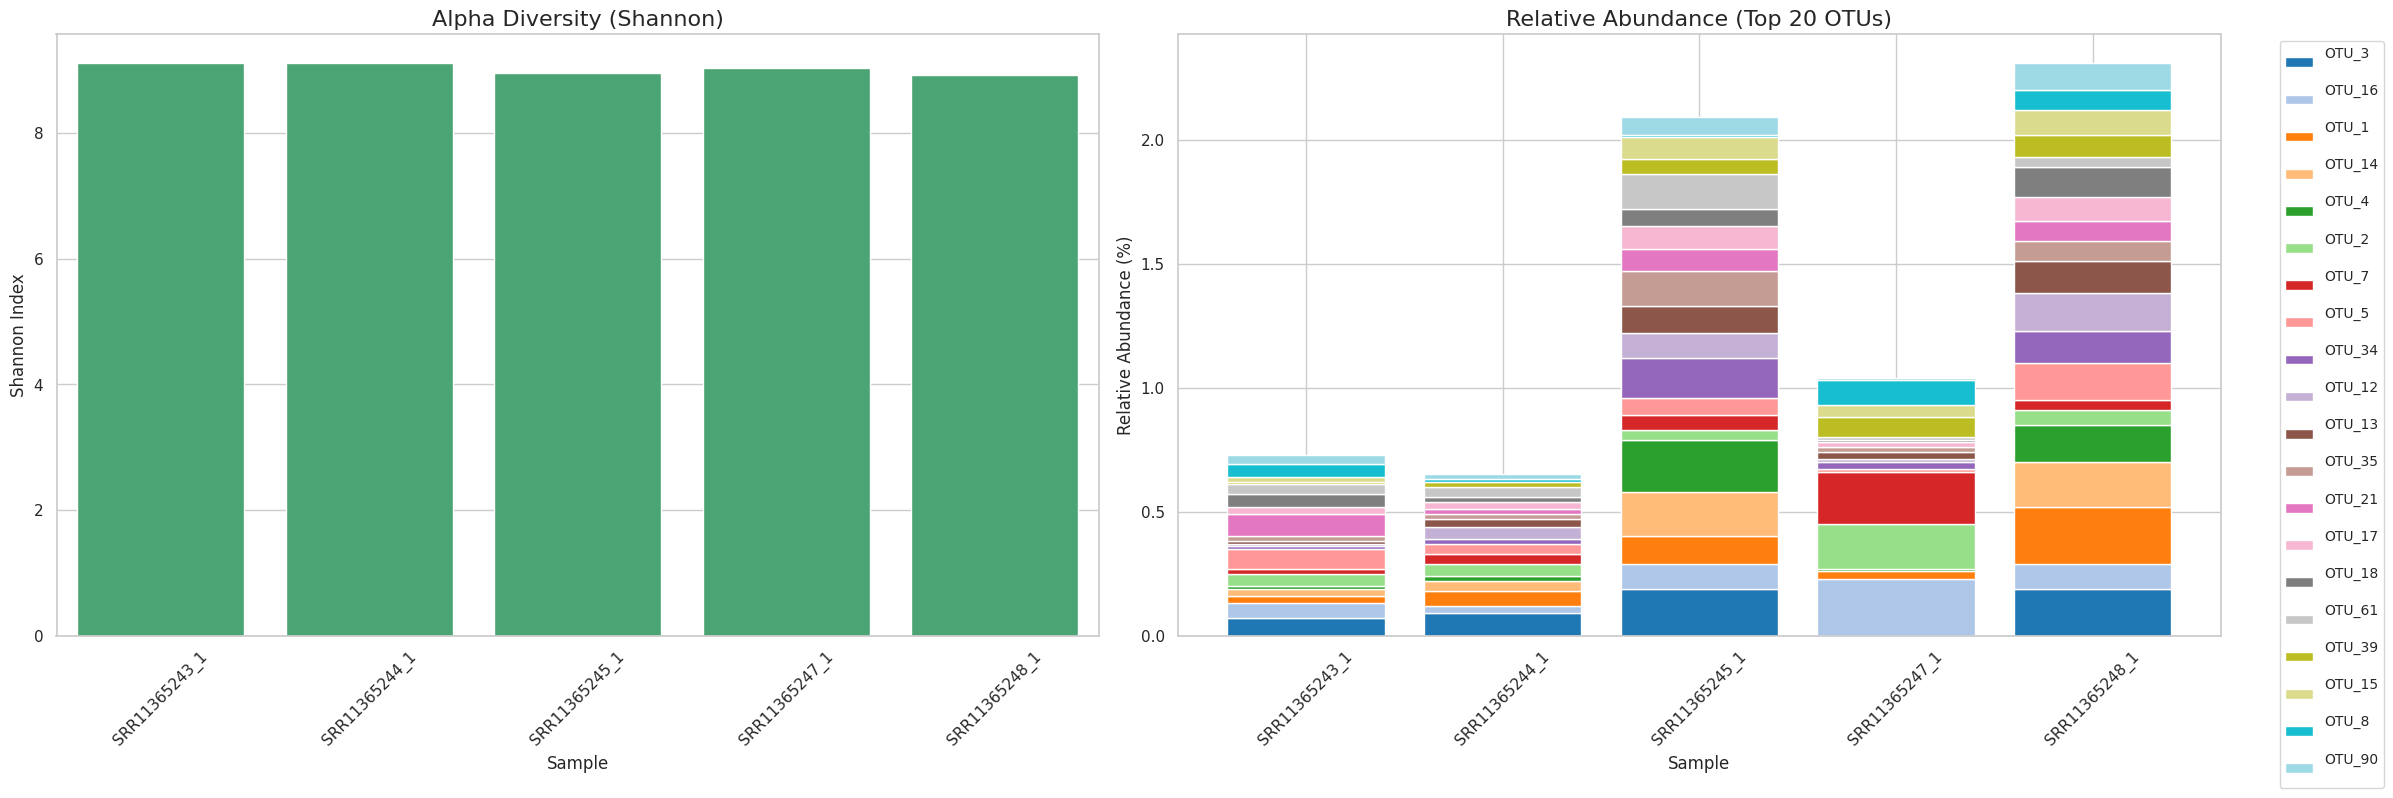

In [ ]:
import os
import urllib.request
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 0. Install vsearch (Colab / Linux only)
# ---------------------------------------------------------
!apt-get update -qq
!apt-get install -y vsearch

# ---------------------------------------------------------
# 1. Download real oral microbiome FASTQ files from ENA
# ---------------------------------------------------------
os.makedirs("oral_fastq", exist_ok=True)

ena_url = "https://www.ebi.ac.uk/ena/portal/api/filereport?accession=PRJNA613956&result=read_run&fields=run_accession,fastq_ftp"
df_runs = pd.read_csv(ena_url, sep="\t")
df_runs.to_csv("PRJNA613956_runs.csv", index=False)

print("Downloading FASTQ files...")
for idx, row in df_runs.head(2).iterrows():  # only first 2 samples
    srr = row["run_accession"]
    urls = row["fastq_ftp"].split(";")
    for i, url in enumerate(urls):
        filename = f"oral_fastq/{srr}_{i+1}.fastq.gz"
        urllib.request.urlretrieve("https://" + url.replace("ftp://", ""), filename)

print("Downloads complete!\n")

# ---------------------------------------------------------
# 2. SUBSET FASTQ FILES to 10,000 reads for SPEED
# ---------------------------------------------------------
os.makedirs("subset_fastq", exist_ok=True)

fastq_files = sorted([f for f in os.listdir("oral_fastq") if f.endswith(".fastq.gz")])

print("Subsampling FASTQ files...")
for fq in fastq_files:
    input_file = f"oral_fastq/{fq}"
    output_file = f"subset_fastq/{fq}"

    # 10,000 reads = 40,000 lines
    !zcat {input_file} | head -n 40000 | gzip > {output_file}

print("Subsampling complete!\n")

# ---------------------------------------------------------
# 3. Convert FASTQ → FASTA
# ---------------------------------------------------------
os.makedirs("fasta", exist_ok=True)

subset_fastq = sorted([f for f in os.listdir("subset_fastq") if f.endswith(".fastq.gz")])

print("Converting FASTQ → FASTA...")
for f in subset_fastq:
    in_file = f"subset_fastq/{f}"
    out_file = f"fasta/{f.replace('.fastq.gz', '.fasta')}"
    subprocess.run(["vsearch", "--fastq_filter", in_file, "--fastaout", out_file])

print("FASTA conversion complete!\n")

# ---------------------------------------------------------
# 4. Combine all FASTA
# ---------------------------------------------------------
combined = "all_samples.fasta"
with open(combined, "w") as outfile:
    for f in sorted(os.listdir("fasta")):
        with open(f"fasta/{f}") as infile:
            outfile.write(infile.read())

print("Combined FASTA created!\n")

# ---------------------------------------------------------
# 5. Dereplication
# ---------------------------------------------------------
print("Running dereplication...")
subprocess.run(["vsearch", "--derep_fulllength", combined, "--output", "derep.fasta", "--sizeout"])

# ---------------------------------------------------------
# 6. OTU clustering (97%)
# ---------------------------------------------------------
print("Clustering OTUs (97%)...")
subprocess.run(["vsearch", "--cluster_size", "derep.fasta",
                "--id", "0.97",
                "--centroids", "otus.fasta",
                "--relabel", "OTU_"])

print("OTU clustering complete!\n")

# ---------------------------------------------------------
# 7. Map reads → OTU table
# ---------------------------------------------------------
otu_table = {}

print("Mapping reads to OTUs...")
for f in subset_fastq:
    sample = f.replace(".fastq.gz", "")
    fasta_file = f"fasta/{sample}.fasta"
    uc_file = f"{sample}.uc"

    subprocess.run(["vsearch", "--usearch_global", fasta_file,
                    "--db", "otus.fasta",
                    "--id", "0.97",
                    "--uc", uc_file])

    counts = {}
    with open(uc_file) as infile:
        for line in infile:
            if line.startswith("H"):
                otu = line.split("\t")[9]
                counts[otu] = counts.get(otu, 0) + 1
    otu_table[sample] = counts

df_otu = pd.DataFrame(otu_table).fillna(0).astype(int)
df_otu.to_csv("REAL_OTU_TABLE.csv")

print("\nREAL OTU TABLE:")
print(df_otu.head(), "\n")

# ---------------------------------------------------------
# 8. Alpha Diversity
# ---------------------------------------------------------
def shannon(counts):
    counts = np.array(counts)
    p = counts[counts > 0] / counts.sum()
    return -np.sum(p * np.log(p))

alpha = df_otu.apply(shannon)
print("Alpha Diversity:\n", alpha, "\n")

# ---------------------------------------------------------
# 9. Relative Abundance
# ---------------------------------------------------------
rel_ab = df_otu.div(df_otu.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 10. Plots (Improved)
# ---------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(24, 8))  # increased width

# -----------------------------
# Alpha Diversity
# -----------------------------
sns.barplot(x=alpha.index, y=alpha.values, ax=axes[0], color="mediumseagreen")
axes[0].set_title("Alpha Diversity (Shannon)", fontsize=16)
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Shannon Index")
axes[0].tick_params(axis='x', rotation=45)

# -----------------------------
# Relative Abundance
# -----------------------------
top_otus = rel_ab.sum(axis=1).sort_values(ascending=False).head(20).index
rel_ab_top = rel_ab.loc[top_otus]
rel_ab_top.T.plot(kind="bar", stacked=True, ax=axes[1], colormap="tab20", width=0.8)
axes[1].set_title("Relative Abundance (Top 20 OTUs)", fontsize=16)
axes[1].set_xlabel("Sample")
axes[1].set_ylabel("Relative Abundance (%)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # you can remove pad argument
plt.show()


